In [1]:
'''import pandas as pd

# Load training TSV
df = pd.read_csv("Tagged_Titles_Train.tsv", sep="\t", keep_default_na=False, na_values=None)

# Clean column names
df.columns = df.columns.str.strip().str.replace("﻿","", regex=True)

print(df.head())
print(df['Category'].value_counts())

df["Tag"] = df["Tag"].str.strip()   # remove leading/trailing spaces
df["Tag"] = df["Tag"].replace("", "O")  # replace empty with "O"

# this is the previous code 
'''
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
# Load training TSV
df = pd.read_csv("Tagged_Titles_Train.tsv", sep="\t", keep_default_na=False, na_values=None)

# Clean column names
df.columns = df.columns.str.strip().str.replace("﻿", "", regex=True)

print(df.head())
print(df['Category'].value_counts())

# Strip spaces
df["Tag"] = df["Tag"].str.strip()
df["Token"] = df["Token"].str.strip()

# Build mapping: (Category, Token) → most frequent Tag (ignoring empty ones)
token_tag_mode = (
    df[df["Tag"] != ""]
    .groupby(["Category", "Token"])["Tag"]
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

# Replace empty tags with most common tag for that token in its category, else "O"
df["Tag"] = df.apply(
    lambda row: token_tag_mode.get((row["Category"], row["Token"]), "O")
    if row["Tag"] == ""
    else row["Tag"],
    axis=1
)

print(df["Tag"].value_counts().head())

   Record Number  Category                                              Title  \
0              1         2  MINI 1.6 W10B16A W11B16A R50 Steuerkettensatz ...   
1              1         2  MINI 1.6 W10B16A W11B16A R50 Steuerkettensatz ...   
2              1         2  MINI 1.6 W10B16A W11B16A R50 Steuerkettensatz ...   
3              1         2  MINI 1.6 W10B16A W11B16A R50 Steuerkettensatz ...   
4              1         2  MINI 1.6 W10B16A W11B16A R50 Steuerkettensatz ...   

     Token                          Tag  
0     MINI    Kompatible_Fahrzeug_Marke  
1      1.6  Kompatibles_Fahrzeug_Modell  
2  W10B16A             Herstellernummer  
3  W11B16A                               
4      R50                               
Category
1    29781
2    27031
Name: count, dtype: int64
Tag
O                              13336
Kompatibles_Fahrzeug_Modell    13240
Kompatible_Fahrzeug_Marke       7568
Im_Lieferumfang_Enthalten       6509
Produktart                      4060
Name: count, dt

In [2]:
print(df["Tag"].unique())

['Kompatible_Fahrzeug_Marke' 'Kompatibles_Fahrzeug_Modell'
 'Herstellernummer' 'Produktart' 'Im_Lieferumfang_Enthalten' 'Hersteller'
 'Modell' 'O' 'Einbauposition' 'Bremsscheiben-Aussendurchmesser'
 'Bremsscheibenart' 'Oe/Oem_Referenznummer(N)' 'Maßeinheit'
 'Anzahl_Der_Einheiten' 'Kompatibles_Fahrzeug_Jahr' 'Produktlinie'
 'Material' 'Größe' 'Länge' 'Breite' 'Besonderheiten' 'Menge' 'Farbe'
 'Stärke' 'Anwendung' 'Oberflächenbeschaffenheit' 'SAE_Viskosität'
 'Zähnezahl' 'Technologie' 'Herstellungsland_Und_-Region']


In [3]:
print(df["Tag"].unique())

['Kompatible_Fahrzeug_Marke' 'Kompatibles_Fahrzeug_Modell'
 'Herstellernummer' 'Produktart' 'Im_Lieferumfang_Enthalten' 'Hersteller'
 'Modell' 'O' 'Einbauposition' 'Bremsscheiben-Aussendurchmesser'
 'Bremsscheibenart' 'Oe/Oem_Referenznummer(N)' 'Maßeinheit'
 'Anzahl_Der_Einheiten' 'Kompatibles_Fahrzeug_Jahr' 'Produktlinie'
 'Material' 'Größe' 'Länge' 'Breite' 'Besonderheiten' 'Menge' 'Farbe'
 'Stärke' 'Anwendung' 'Oberflächenbeschaffenheit' 'SAE_Viskosität'
 'Zähnezahl' 'Technologie' 'Herstellungsland_Und_-Region']


In [4]:
print(df["Tag"].unique())

['Kompatible_Fahrzeug_Marke' 'Kompatibles_Fahrzeug_Modell'
 'Herstellernummer' 'Produktart' 'Im_Lieferumfang_Enthalten' 'Hersteller'
 'Modell' 'O' 'Einbauposition' 'Bremsscheiben-Aussendurchmesser'
 'Bremsscheibenart' 'Oe/Oem_Referenznummer(N)' 'Maßeinheit'
 'Anzahl_Der_Einheiten' 'Kompatibles_Fahrzeug_Jahr' 'Produktlinie'
 'Material' 'Größe' 'Länge' 'Breite' 'Besonderheiten' 'Menge' 'Farbe'
 'Stärke' 'Anwendung' 'Oberflächenbeschaffenheit' 'SAE_Viskosität'
 'Zähnezahl' 'Technologie' 'Herstellungsland_Und_-Region']


In [5]:
# Count empty tags per category
empty_counts = df[df["Tag"] == "O"].groupby("Category")["Tag"].count()

print("Empty tag counts by category:")
print(empty_counts)

Empty tag counts by category:
Category
1    6581
2    6755
Name: Tag, dtype: int64


In [6]:
# Split into category-specific datasets
cat1_df = df[df['Category'] == 1].copy()
cat2_df = df[df['Category'] == 2].copy()

print("Category 1 size:", len(cat1_df))
print("Category 2 size:", len(cat2_df))

Category 1 size: 29781
Category 2 size: 27031


In [7]:
def group_sentences(df):
    sentences = []
    for rec_id, group in df.groupby("Record Number"):
        tokens = group["Token"].tolist()
        tags = group["Tag"].fillna("None").tolist()  # replace missing with 'O'
        sentences.append((tokens, tags))
    return sentences

cat1_sentences = group_sentences(cat1_df)
cat2_sentences = group_sentences(cat2_df)

print(cat1_sentences[0])  # preview first sentence

(['ATE', 'Power', 'Disc', 'Bremsenset', 'Mercedes', 'SLC', '+', 'SLK', 'Vorne', '295MM', '+', 'Hinten', '300MM'], ['Hersteller', 'Modell', 'O', 'Produktart', 'Kompatible_Fahrzeug_Marke', 'Kompatibles_Fahrzeug_Modell', 'O', 'Kompatibles_Fahrzeug_Modell', 'Einbauposition', 'Bremsscheiben-Aussendurchmesser', 'O', 'Einbauposition', 'Bremsscheiben-Aussendurchmesser'])


In [8]:
from collections import defaultdict

def build_vocab(sentences):
    word2idx = {"<PAD>": 0, "<UNK>": 1}
    tag2idx = {}
    for tokens, tags in sentences:
        for token in tokens:
            token = token.lower()  # normalize
            if token not in word2idx:
                word2idx[token] = len(word2idx)
        for tag in tags:
            if tag not in tag2idx:
                tag2idx[tag] = len(tag2idx)
    idx2tag = {v:k for k,v in tag2idx.items()}
    return word2idx, tag2idx, idx2tag

cat1_word2idx, cat1_tag2idx, cat1_idx2tag = build_vocab(cat1_sentences)
cat2_word2idx, cat2_tag2idx, cat2_idx2tag = build_vocab(cat2_sentences)

print("Category 1 vocab size:", len(cat1_word2idx))
print("Category 1 tag set:", cat1_tag2idx)

Category 1 vocab size: 3003
Category 1 tag set: {'Hersteller': 0, 'Modell': 1, 'O': 2, 'Produktart': 3, 'Kompatible_Fahrzeug_Marke': 4, 'Kompatibles_Fahrzeug_Modell': 5, 'Einbauposition': 6, 'Bremsscheiben-Aussendurchmesser': 7, 'Im_Lieferumfang_Enthalten': 8, 'Bremsscheibenart': 9, 'Herstellernummer': 10, 'Maßeinheit': 11, 'Anzahl_Der_Einheiten': 12, 'Kompatibles_Fahrzeug_Jahr': 13, 'Produktlinie': 14, 'Material': 15, 'Größe': 16, 'Besonderheiten': 17, 'Farbe': 18, 'Oe/Oem_Referenznummer(N)': 19, 'Stärke': 20, 'Oberflächenbeschaffenheit': 21, 'Technologie': 22, 'Herstellungsland_Und_-Region': 23}


In [9]:
import torch
from torch.nn.utils.rnn import pad_sequence

def encode_sentences(sentences, word2idx, tag2idx, max_len=50):
    X, y = [], []
    for tokens, tags in sentences:
        token_ids = [word2idx.get(t.lower(), word2idx["<UNK>"]) for t in tokens]
        tag_ids = [tag2idx[t] for t in tags]
        # truncate if too long
        token_ids = token_ids[:max_len]
        tag_ids = tag_ids[:max_len]
        # convert to tensor
        X.append(torch.tensor(token_ids, dtype=torch.long))
        y.append(torch.tensor(tag_ids, dtype=torch.long))
    # pad
    X_padded = pad_sequence(X, batch_first=True, padding_value=word2idx["<PAD>"])
    y_padded = pad_sequence(y, batch_first=True, padding_value=-100)  # -100 ignored in loss
    mask = (X_padded != word2idx["<PAD>"]).long()
    return X_padded, y_padded, mask

cat1_X, cat1_y, cat1_mask = encode_sentences(cat1_sentences, cat1_word2idx, cat1_tag2idx)
cat2_X, cat2_y, cat2_mask = encode_sentences(cat2_sentences, cat2_word2idx, cat2_tag2idx)

print("Category 1 tensors:", cat1_X.shape, cat1_y.shape, cat1_mask.shape)

Category 1 tensors: torch.Size([2500, 21]) torch.Size([2500, 21]) torch.Size([2500, 21])


In [10]:
print(cat1_tag2idx)

{'Hersteller': 0, 'Modell': 1, 'O': 2, 'Produktart': 3, 'Kompatible_Fahrzeug_Marke': 4, 'Kompatibles_Fahrzeug_Modell': 5, 'Einbauposition': 6, 'Bremsscheiben-Aussendurchmesser': 7, 'Im_Lieferumfang_Enthalten': 8, 'Bremsscheibenart': 9, 'Herstellernummer': 10, 'Maßeinheit': 11, 'Anzahl_Der_Einheiten': 12, 'Kompatibles_Fahrzeug_Jahr': 13, 'Produktlinie': 14, 'Material': 15, 'Größe': 16, 'Besonderheiten': 17, 'Farbe': 18, 'Oe/Oem_Referenznummer(N)': 19, 'Stärke': 20, 'Oberflächenbeschaffenheit': 21, 'Technologie': 22, 'Herstellungsland_Und_-Region': 23}


In [11]:
print(cat1_idx2tag)

{0: 'Hersteller', 1: 'Modell', 2: 'O', 3: 'Produktart', 4: 'Kompatible_Fahrzeug_Marke', 5: 'Kompatibles_Fahrzeug_Modell', 6: 'Einbauposition', 7: 'Bremsscheiben-Aussendurchmesser', 8: 'Im_Lieferumfang_Enthalten', 9: 'Bremsscheibenart', 10: 'Herstellernummer', 11: 'Maßeinheit', 12: 'Anzahl_Der_Einheiten', 13: 'Kompatibles_Fahrzeug_Jahr', 14: 'Produktlinie', 15: 'Material', 16: 'Größe', 17: 'Besonderheiten', 18: 'Farbe', 19: 'Oe/Oem_Referenznummer(N)', 20: 'Stärke', 21: 'Oberflächenbeschaffenheit', 22: 'Technologie', 23: 'Herstellungsland_Und_-Region'}


In [22]:
# === Fixed BiLSTM-CRF Class (supports pretrained embeddings) ===
import torch
import torch.nn as nn
from torchcrf import CRF

class BiLSTMCRF(nn.Module):
    def __init__(self, vocab_size, tagset_size, emb_dim=100, hidden_dim=128,
                 pad_idx=0, dropout=0.3, pretrained_matrix=None):
        super(BiLSTMCRF, self).__init__()

        # Embedding layer (optionally with pretrained FastText / Word2Vec)
        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=pad_idx)
        if pretrained_matrix is not None:
            print("✅ Using pretrained embeddings")
            self.embedding.weight.data.copy_(pretrained_matrix)
            self.embedding.weight.requires_grad = True

        # BiLSTM encoder
        self.lstm = nn.LSTM(emb_dim, hidden_dim // 2,
                            batch_first=True, bidirectional=True)

        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)

        # Fully connected layer → project to tag space
        self.fc = nn.Linear(hidden_dim, tagset_size)

        # CRF layer
        self.crf = CRF(tagset_size, batch_first=True)

    def forward(self, tokens, tags=None, mask=None):
        emb = self.embedding(tokens)
        lstm_out, _ = self.lstm(emb)
        lstm_out = self.dropout(lstm_out)
        emissions = self.fc(lstm_out)

        if mask is not None and mask.dtype != torch.bool:
            mask = mask.bool()

        if tags is not None:
            # Training mode
            loss = -self.crf(emissions, tags, mask=mask, reduction='mean')
            return loss
        else:
            # Inference mode
            return self.crf.decode(emissions, mask=mask)

In [20]:
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
# from seqeval.metrics import classification_report, f1_score    
from sklearn.metrics import f1_score, classification_report

def build_loaders(X, y, mask, batch_size=16, val_ratio=0.2, seed=42):
    # IMPORTANT: torchcrf ignores positions where mask==0,
    # so y at PAD positions can be any integer (we'll just set 0 there).
    y = y.clone()
    y[mask == 0] = 0

    ds = TensorDataset(X, y, mask)
    n_total = len(ds)
    n_val = int(val_ratio * n_total)
    n_train = n_total - n_val
    g = torch.Generator().manual_seed(seed)
    train_ds, val_ds = random_split(ds, [n_train, n_val], generator=g)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader

def ids_to_tags(batch_ids, batch_mask, idx2tag):
    # print('A', idx2tag)
    # Convert batch of id sequences to list of tag strings, trimming PADs using mask
    out = []
    for ids, m in zip(batch_ids, batch_mask):
        ids = ids[m == 1].tolist()
        out.append([idx2tag[i] for i in ids])
    # print('B', out)
    return out

def preds_to_tags(pred_paths, idx2tag):
    # pred_paths is a list of variable-length sequences already trimmed by CRF
    return [[idx2tag[i] for i in path] for path in pred_paths]

def metrics_on_loader(model, loader, idx2tag, device="cpu"):
    model.eval()
    all_true_flat, all_pred_flat = [], []
    with torch.no_grad():
        for Xb, yb, mb in loader:
            Xb, yb, mb = Xb.to(device), yb.to(device), mb.to(device)
            
            # Predictions (list of lists)
            pred_paths = model(Xb, tags=None, mask=mb)
            
            for true_seq, pred_seq, mask_seq in zip(yb.cpu(), pred_paths, mb.cpu()):
                # Only keep tokens where mask == 1
                true_seq = true_seq[mask_seq == 1].tolist()
                pred_seq = pred_seq[:len(true_seq)]
                
                all_true_flat.extend(true_seq)
                all_pred_flat.extend(pred_seq)

    # Convert indices to tag names
    true_tags = [idx2tag[i] for i in all_true_flat]
    pred_tags = [idx2tag[i] for i in all_pred_flat]

    # F1 and report
    f1 = f1_score(true_tags, pred_tags, average="macro")
    report = classification_report(true_tags, pred_tags, digits=3)
    return f1, report

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

def train_one_category(
    X, y, mask, word2idx, tag2idx, idx2tag,
    emb_dim=100, hidden_dim=128, batch_size=32,
    lr=1e-3, epochs=100, patience=10, device="cpu",
    pretrained_matrix=None
):
    pad_idx = word2idx["<PAD>"]
    tagset_size = len(tag2idx)
    train_loader, val_loader = build_loaders(X, y, mask, batch_size=batch_size)

    model = BiLSTMCRF(
        vocab_size=len(word2idx),
        tagset_size=tagset_size,
        emb_dim=emb_dim,
        hidden_dim=hidden_dim,
        pad_idx=pad_idx,
        dropout=0.3,
        pretrained_matrix=pretrained_matrix
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = ReduceLROnPlateau(optimizer, mode="max", factor=0.5, patience=3)

    best_f1 = -1.0
    best_state = None
    patience_counter = 0
    train_losses, val_f1s = [], []

    print(f"Training on device: {device.upper()} for up to {epochs} epochs...")

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0

        for Xb, yb, mb in train_loader:
            Xb, yb, mb = Xb.to(device), yb.to(device), mb.to(device).bool()
            optimizer.zero_grad()
            loss = model(Xb, tags=yb, mask=mb)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 5.0)
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)

        # --- Evaluate ---
        f1, _ = metrics_on_loader(model, val_loader, idx2tag, device=device)
        val_f1s.append(f1)

        # --- Scheduler ---
        scheduler.step(f1)

        print(f"Epoch {epoch:03d} | Loss: {avg_loss:.4f} | Val F1: {f1:.4f} | LR: {optimizer.param_groups[0]['lr']:.6f}")

        # --- Early stopping ---
        if f1 > best_f1:
            best_f1 = f1
            best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"⏹️ Early stopping triggered at epoch {epoch}")
                break

    # Restore best weights
    if best_state:
        model.load_state_dict(best_state)

    # --- Final metrics ---
    final_f1, report = metrics_on_loader(model, val_loader, idx2tag, device=device)
    print(f"\n✅ Best Validation F1: {best_f1:.4f}")
    print(report)

    # --- Plot Loss & F1 ---
    plt.figure(figsize=(7, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_f1s, label="Validation F1")
    plt.xlabel("Epoch")
    plt.ylabel("Metric")
    plt.title("Training Progress")
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, best_f1

=== Train Category 1 model ===
Training on device: CPU for up to 100 epochs...
Epoch 001 | Loss: 22.0765 | Val F1: 0.3166 | LR: 0.001000
Epoch 002 | Loss: 8.1014 | Val F1: 0.4833 | LR: 0.001000
Epoch 003 | Loss: 5.4068 | Val F1: 0.5425 | LR: 0.001000
Epoch 004 | Loss: 4.2323 | Val F1: 0.5776 | LR: 0.001000
Epoch 005 | Loss: 3.5230 | Val F1: 0.6040 | LR: 0.001000
Epoch 006 | Loss: 3.0342 | Val F1: 0.6263 | LR: 0.001000
Epoch 007 | Loss: 2.6409 | Val F1: 0.6816 | LR: 0.001000
Epoch 008 | Loss: 2.3349 | Val F1: 0.6633 | LR: 0.001000
Epoch 009 | Loss: 2.0970 | Val F1: 0.7210 | LR: 0.001000
Epoch 010 | Loss: 1.8882 | Val F1: 0.7373 | LR: 0.001000
Epoch 011 | Loss: 1.7114 | Val F1: 0.7442 | LR: 0.001000
Epoch 012 | Loss: 1.5272 | Val F1: 0.7445 | LR: 0.001000
Epoch 013 | Loss: 1.4035 | Val F1: 0.7466 | LR: 0.001000
Epoch 014 | Loss: 1.2692 | Val F1: 0.7482 | LR: 0.001000
Epoch 015 | Loss: 1.1701 | Val F1: 0.7446 | LR: 0.001000
Epoch 016 | Loss: 1.0647 | Val F1: 0.7444 | LR: 0.001000
Epoch 01

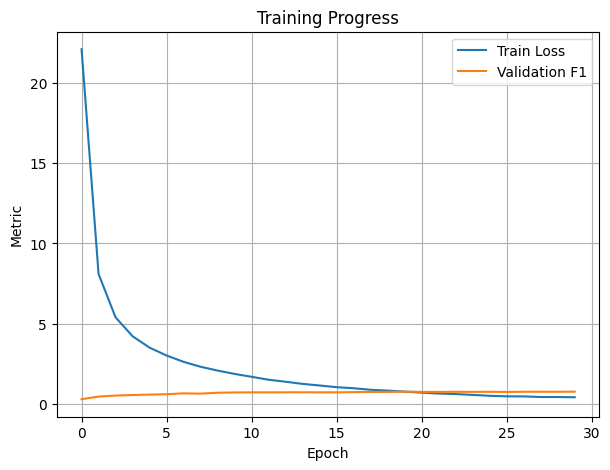


=== Train Category 2 model ===
Training on device: CPU for up to 100 epochs...
Epoch 001 | Loss: 21.2974 | Val F1: 0.2446 | LR: 0.001000
Epoch 002 | Loss: 9.0856 | Val F1: 0.2978 | LR: 0.001000
Epoch 003 | Loss: 6.5473 | Val F1: 0.3200 | LR: 0.001000
Epoch 004 | Loss: 5.3269 | Val F1: 0.3597 | LR: 0.001000
Epoch 005 | Loss: 4.4852 | Val F1: 0.3634 | LR: 0.001000
Epoch 006 | Loss: 3.8210 | Val F1: 0.3676 | LR: 0.001000
Epoch 007 | Loss: 3.3276 | Val F1: 0.3721 | LR: 0.001000
Epoch 008 | Loss: 2.9056 | Val F1: 0.3974 | LR: 0.001000
Epoch 009 | Loss: 2.5347 | Val F1: 0.4291 | LR: 0.001000
Epoch 010 | Loss: 2.2157 | Val F1: 0.4829 | LR: 0.001000
Epoch 011 | Loss: 1.9288 | Val F1: 0.4813 | LR: 0.001000
Epoch 012 | Loss: 1.7042 | Val F1: 0.4842 | LR: 0.001000
Epoch 013 | Loss: 1.5027 | Val F1: 0.4837 | LR: 0.001000
Epoch 014 | Loss: 1.3272 | Val F1: 0.4905 | LR: 0.001000
Epoch 015 | Loss: 1.1746 | Val F1: 0.5321 | LR: 0.001000
Epoch 016 | Loss: 1.0516 | Val F1: 0.5291 | LR: 0.001000
Epoch 0

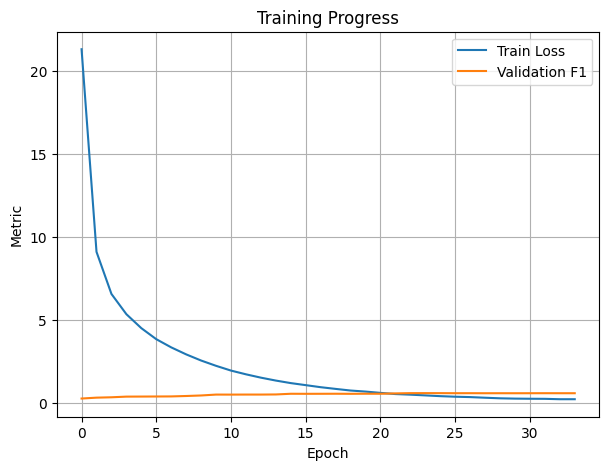

In [23]:
device = "cpu"  # or "mps" on Mac M1/M2
print("=== Train Category 1 model ===")
model_cat1, best_f1_cat1 = train_one_category(
    cat1_X, cat1_y, cat1_mask, cat1_word2idx, cat1_tag2idx, cat1_idx2tag,
    emb_dim=100, hidden_dim=128, batch_size=32, lr=1e-3, epochs=100,
    patience=10, device=device
)

print("\n=== Train Category 2 model ===")
model_cat2, best_f1_cat2 = train_one_category(
    cat2_X, cat2_y, cat2_mask, cat2_word2idx, cat2_tag2idx, cat2_idx2tag,
    emb_dim=100, hidden_dim=128, batch_size=32, lr=1e-3, epochs=100,
    patience=10, device=device
)

# Save best models
torch.save({"state_dict": model_cat1.state_dict(),
            "word2idx": cat1_word2idx, "tag2idx": cat1_tag2idx}, "bilstm_crf_cat1.pt")
torch.save({"state_dict": model_cat2.state_dict(),
            "word2idx": cat2_word2idx, "tag2idx": cat2_tag2idx}, "bilstm_crf_cat2.pt")

In [24]:
import torch

def predict_tokens(model, tokens, word2idx, idx2tag, device="cpu"):
    # Convert tokens → IDs
    token_ids = [word2idx.get(t.lower(), word2idx["<UNK>"]) for t in tokens]
    seq_len = len(token_ids)

    token_tensor = torch.tensor([token_ids], dtype=torch.long, device=device)
    mask = torch.ones((1, seq_len), dtype=torch.long, device=device)  # match length

    # Predict
    model.eval()
    with torch.no_grad():
        pred_paths = model(token_tensor, tags=None, mask=mask)

    pred_tags = [idx2tag[i] for i in pred_paths[0]]
    return pred_tags

In [25]:
def model_cat1_predict(tokens):
    return predict_tokens(model_cat1, tokens, cat1_word2idx, cat1_idx2tag, device=device)

def model_cat2_predict(tokens):
    return predict_tokens(model_cat2, tokens, cat2_word2idx, cat2_idx2tag, device=device)

In [26]:
import pandas as pd
import csv

# Load listing titles (all 200k)
listings = pd.read_csv(
    "Listing_Titles.tsv",
    sep="\t",
    keep_default_na=False,
    na_values=None
)

# Filter to Quiz/Test records
quiz_df = listings[(listings["Record Number"] >= 5001) &
                   (listings["Record Number"] <= 30000)]

submission_rows = []

for _, row in quiz_df.iterrows():
    record = row["Record Number"]
    category = row["Category"]
    title = row["Title"]
    tokens = title.split()   # or use smarter tokenizer

    if category == 1:
        pred_tags = model_cat1_predict(tokens)
    else:
        pred_tags = model_cat2_predict(tokens)

    for token, tag in zip(tokens, pred_tags):
        submission_rows.append([record, category, tag, token])

import csv

sub_df = pd.DataFrame(submission_rows,
                      columns=["Record Number","Category","Aspect Name","Aspect Value"])

sub_df.to_csv("submission_15_2.tsv",
              sep="\t",
              index=False,
              quoting=csv.QUOTE_NONE,
              encoding="utf-8-sig")
